In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

#TO MAKE PLOTS LOOK NICER
from itertools import cycle
sns.set_theme(style="white", palette=None)
color_pal= plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle= cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

LOAD THE DATA

In [2]:
data_files=glob('data/*.m4a')
data_files

['data/S3.m4a',
 'data/I10.m4a',
 'data/A11.m4a',
 'data/U11.m4a',
 'data/S9.m4a',
 'data/P3.m4a',
 'data/U15.m4a',
 'data/E10.m4a',
 'data/I1.m4a',
 'data/A14.m4a',
 'data/U12.m4a',
 'data/A3.m4a',
 'data/P17.m4a',
 'data/I4.m4a',
 'data/O3.m4a',
 'data/I15.m4a',
 'data/P15.m4a',
 'data/S7.m4a',
 'data/S8.m4a',
 'data/A6.m4a',
 'data/O14.m4a',
 'data/S5.m4a',
 'data/S17.m4a',
 'data/O11.m4a',
 'data/U7.m4a',
 'data/U16.m4a',
 'data/I16.m4a',
 'data/I12.m4a',
 'data/E12.m4a',
 'data/O12.m4a',
 'data/O16.m4a',
 'data/S16.m4a',
 'data/A7.m4a',
 'data/E14.m4a',
 'data/U14.m4a',
 'data/A13.m4a',
 'data/U3.m4a',
 'data/A15.m4a',
 'data/P4.m4a',
 'data/U5.m4a',
 'data/U13.m4a',
 'data/I8.m4a',
 'data/E7.m4a',
 'data/A17.m4a',
 'data/U1.m4a',
 'data/A5.m4a',
 'data/A12.m4a',
 'data/E15.m4a',
 'data/I9.m4a',
 'data/A2.m4a',
 'data/U8.m4a',
 'data/I3.m4a',
 'data/U17.m4a',
 'data/E8.m4a',
 'data/O4.m4a',
 'data/E9.m4a',
 'data/S14.m4a',
 'data/E16.m4a',
 'data/E5.m4a',
 'data/E3.m4a',
 'data/S1

In [12]:
FILE=3

In [13]:
ipd.Audio(data_files[FILE])

##### OPEN AN AUDIO FILE

In [14]:
y, sr = librosa.load(data_files[FILE])
print(f'y: {y[100:107]}')
print(f'Shpe y: {y.shape}')
print(f'Sample Rate: {sr}')

y: [ 5.96194070e-07  1.32054038e-06 -2.95000495e-06 -1.02630365e-05
 -1.20065006e-05 -7.02534544e-06  2.22009760e-07]
Shpe y: (18432,)
Sample Rate: 22050


### AUDIO VISUALIZATION

<AxesSubplot:title={'center':'Raw audio'}>

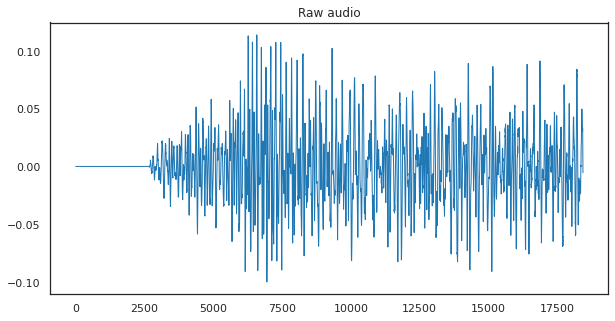

In [15]:
pd.Series(y).plot(figsize=(10,5), lw=1, title='Raw audio', color=color_pal[0])

TRIM THE AUDIO

<AxesSubplot:title={'center':'Trimmed Raw audio'}>

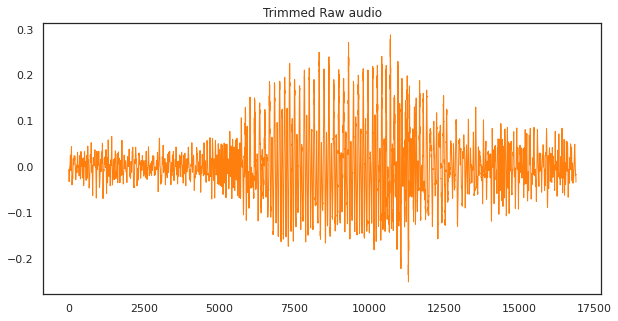

In [32]:
y_trimmed , _ = librosa.effects.trim(y, top_db=15)
pd.Series(y_trimmed).plot(figsize=(10,5), lw=1, title='Trimmed Raw audio', color=color_pal[1])

ZOOM IN

<AxesSubplot:title={'center':'A'}>

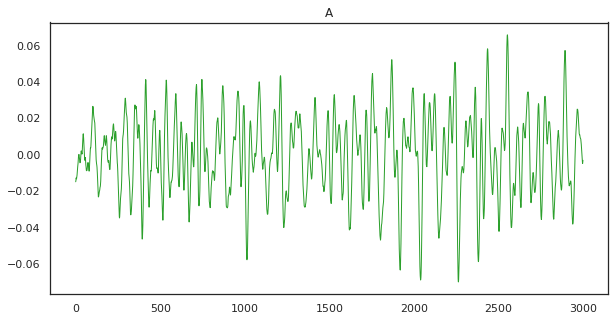

In [33]:
pd.Series(y[4000:7000]).plot(figsize=(10,5), lw=1, title='A', color=color_pal[2])

### SPECTOGRAM

In [34]:
D = librosa.stft(y)
S_db= librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 44)

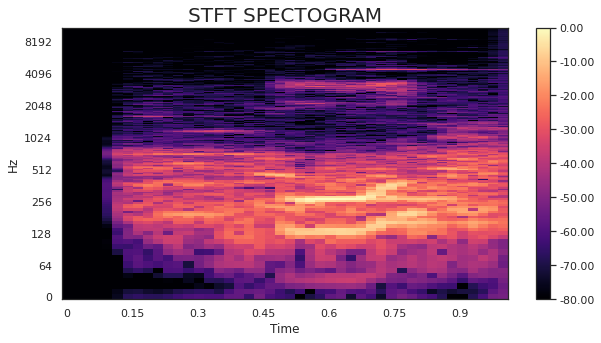

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('STFT SPECTOGRAM', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')

MEL SPECTOGRAM

In [42]:
S=librosa.feature.melspectrogram(y, sr=sr, n_mels=430,)
S_db_mel= librosa.amplitude_to_db(S, ref=np.max)

/tmp/ipykernel_8015/3413372924.py:1: FutureWarning: Pass y=[-1.1328528e-05  8.3436362e-06 -5.5753108e-06 ... -2.4409773e-02
 -2.7935056e-02 -3.4451209e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S=librosa.feature.melspectrogram(y, sr=sr, n_mels=430,)


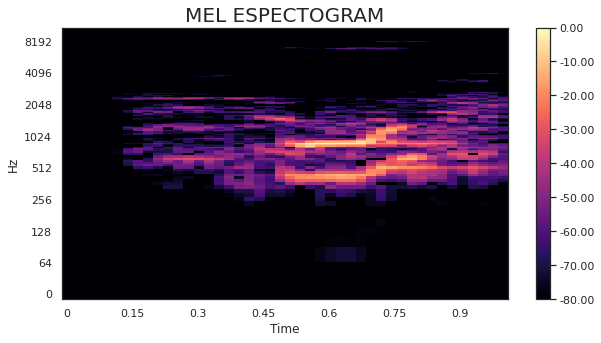

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
ax.set_title('MEL ESPECTOGRAM', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')